In [0]:
import pandas as pd
import numpy as np

In [0]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
  
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv('health_data.csv')
df.head()

,income,maternal,fam-history,mat-illness-past,suppl,mat-illness,meds,env,lifestyle,target
0,4,0,0,0,4,1,0,0,2,0
1,2,0,0,0,2,2,3,3,3,0
2,3,1,0,0,5,0,0,0,2,0
3,4,1,0,#NULL!,3,0,1,1,2,0
4,2,0,0,0,1,0,0,0,0,0


In [0]:
df.replace(to_replace = '#NULL!', value = '0', inplace = True)
df.head()

,income,maternal,fam-history,mat-illness-past,suppl,mat-illness,meds,env,lifestyle,target
0,4,0,0,0,4,1,0,0,2,0
1,2,0,0,0,2,2,3,3,3,0
2,3,1,0,0,5,0,0,0,2,0
3,4,1,0,0,3,0,1,1,2,0
4,2,0,0,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Distribution of data,(0, 1)')

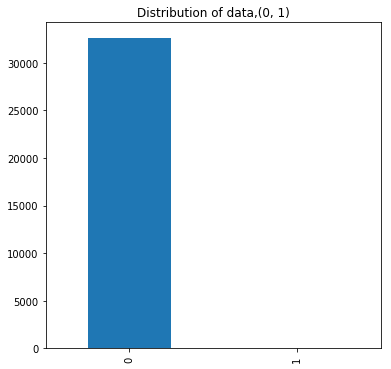

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
df.target.value_counts().plot(kind='bar')
plt.title("Distribution of data,(0, 1)")

In [0]:
df.groupby('target').size()

target
0    32611
1       59
dtype: int64

In [0]:
df.target.unique()
print(df.shape)

(32670, 10)


In [0]:
x=df.iloc[:,0:9]
y=df['target']

In [0]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]


In [0]:
from sklearn.svm import LinearSVC
from sklearn import svm
d = {}
def model_selection(x_train, y_train, x_test, y_test):
  

  # KNN 
  knn = KNeighborsClassifier(n_neighbors = 3)
  knn.fit(x_train, y_train)
  #print("KNN : %f" % knn.score(x_test, y_test))
  d.update(KNN = knn.score(x_test,y_test))
  
  #SVM
  svc = svm.SVC(kernel='linear', C=0.0025).fit(x_train, y_train)
  #print("SVC Linear : %f" % svc.score(x_test, y_test))
  d.update(svc_linear=svc.score(x_test,y_test))
  
  #Decision Tree
  dtc = DecisionTreeClassifier(max_depth=5)
  dtc.fit(x_train,y_train)
  #print("DecisionTreeClassifier : %f" % dtc.score(x_test, y_test))
  d.update( DecisionTreeClassifier= dtc.score(x_test,y_test))
  
  #SVM gamma
  sv = SVC(gamma=2, C=1.0).fit(x_train, y_train)
  sv.fit(x_train,y_train)
  #print("SVC Gamma : %f" % sv.score(x_test, y_test))
  d.update(svc_Gamma =sv.score(x_test,y_test))
 
  #Gaussian
  model = GaussianNB()
  model.fit(x_train, y_train)
  #print("GAussian : %f" % model.score(x_test, y_test))
  d.update(Gaussian = model.score(x_test,y_test))
  
  #Random Forrest Classifier
  rc = RandomForestClassifier(max_depth = 5, n_estimators=100, n_jobs=3, max_features = 1)
  rc.fit(x_train, y_train)
  #print("Random : %f" % rc.score(x_test, y_test))
  d.update(Random = rc.score(x_test,y_test))
  
  return d

In [0]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler, Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
  
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

d = {}

def Knn(x_train, y_train, x_test, y_test):
  # KNN 
  knn = KNeighborsClassifier(n_neighbors = 3)
  knn.fit(x_train, y_train)
  #print("KNN : %f" % knn.score(x_test, y_test))
  d.update(KNN = knn.score(x_test,y_test))

def svm(x_train, y_train, x_test, y_test):
  #SVM
  svc = svm.SVC(kernel='linear', C=0.0025).fit(x_train, y_train)
  #print("SVC Linear : %f" % svc.score(x_test, y_test))
  d.update(svc_linear=svc.score(x_test,y_test))
  

def dtc(x_train, y_train, x_test, y_test):
  #Decision Tree
  dtc = DecisionTreeClassifier(max_depth=5)
  dtc.fit(x_train,y_train)
  #print("DecisionTreeClassifier : %f" % dtc.score(x_test, y_test))
  d.update( DecisionTreeClassifier= dtc.score(x_test,y_test))

def gnb(x_train, y_train, x_test, y_test):
  #Gaussian
  model = GaussianNB()
  model.fit(x_train, y_train)
  #print("GAussian : %f" % model.score(x_test, y_test))
  d.update(Gaussian = model.score(x_test,y_test))

def rfc(x_train, y_train, x_test, y_test):
  #Random Forrest Classifier
  rc = RandomForestClassifier(max_depth = 5, n_estimators=100, n_jobs=3, max_features = 1)
  rc.fit(x_train, y_train)
  #print("Random : %f" % rc.score(x_test, y_test))
  d.update(Random = rc.score(x_test,y_test))

def svg(x_train, y_train, x_test, y_test):
  #SVM gamma
  sv = svm.SVC(gamma=2, C=1.0).fit(x_train, y_train)
  #print("SVC Gamma : %f" % sv.score(x_test, y_test))
  d.update(svc_Gamma =dt.score(x_test,y_test))

def gpc(x_train, y_train, x_test, y_test):
  #Gaussian Process Classifier
  gpc = GaussianProcessClassifier(1.0 * RBF(1.0))
  gpc.fit(x_train, y_train)
  #print("Gaussian Process Classifier : %f" % gpc.score(x_test, y_test))


def model_selection(x_train, y_train, x_test, y_test):
  
  
  Knn(x_train, y_train, x_test, y_test)
  svm(x_train, y_train, x_test, y_test)
  dtc(x_train, y_train, x_test, y_test)
  gnb(x_train, y_train, x_test, y_test)
  rfc(x_train, y_train, x_test, y_test)
  gpc(x_train, y_train, x_test, y_test)
  svg(x_train, y_train, x_test, y_test)
    
  return d

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size = 0.20)
d = model_selection(x_train, y_train, x_test, y_test)
d = sorted(d.items(), key=lambda x: x[1], reverse=True)

for i in d:
  print(i)  
  

('KNN', 0.9981634527089073)
('svc_linear', 0.9981634527089073)
('svc_Gamma', 0.9981634527089073)
('Random', 0.9981634527089073)
('DecisionTreeClassifier', 0.9978573614937252)
('Gaussian', 0.9742883379247016)


'\nerror=[]\nfor i in range(1, 50):\n    knn=KNeighborsClassifier(n_neighbors=i)\n    knn.fit(x_train,y_train)\n    pred_i=knn.predict(x_test)\n    pred_i=pred_i.reshape(50,1)\n    error.append(np.mean(pred_i != y_test))\n\na=[]\nfor i in range(1,50):\n    a.append(i)\nplt.plot(a,error)\n\n'

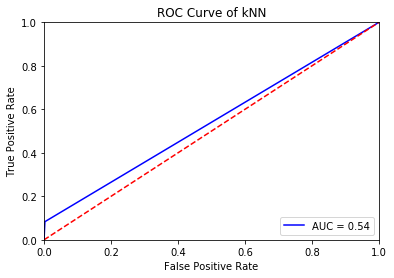

In [0]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

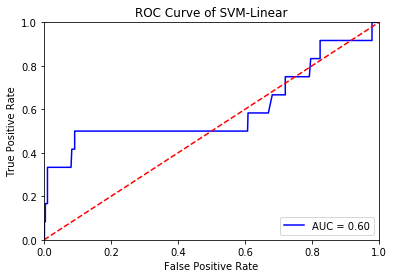

In [0]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


svc = SVC(kernel='linear', C=0.0025, probability = True).fit(x_train, y_train)
y_scores = svc.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM-Linear')
plt.show()

gamma = 1.00  accuracy = 1.00   AUC = 0.79


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


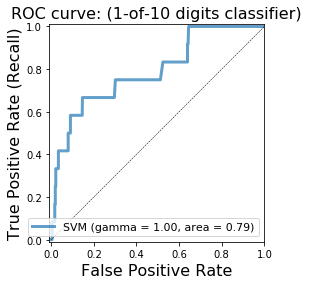

In [0]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

svm = SVC(gamma=2.0, C=1).fit(x_train, y_train)
y_score_svm = svm.decision_function(x_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
accuracy_svm = svm.score(x_test, y_test)
print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, roc_auc_svm))
plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

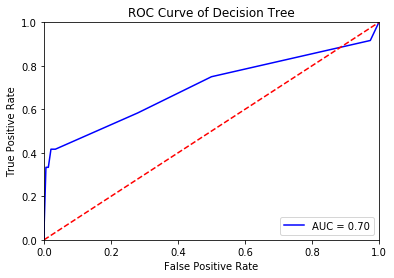

In [0]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train,y_train)

y_scores = dtc.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

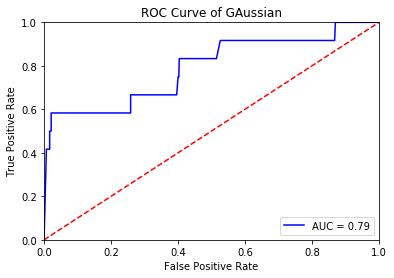

In [0]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

model = GaussianNB()
model.fit(x_train, y_train)

y_score = model.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of GAussian')
plt.show()